In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("../dataset/CO2 Emmisions in Rawanda/train.csv")
df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

In [5]:
features = ["Sulfur Dioxide","Carbon Monoxide","Nitrogen Dioxide","Formaldehyde","Aerosol Content"]

In [6]:
df['SulphurDioxide_cloud_fraction'].isna().sum()

14609

In [7]:
num_rows = df.shape[0]
percentage_missing =df.isnull().sum()
missing_percent = percentage_missing.reset_index()


In [8]:
missing_percent.columns = ["features", "percent"]
missing_percent['percent'] = missing_percent["percent"].apply(lambda x:( x / len(df)) * 100)
missing_percent

,features,percent
0,ID_LAT_LON_YEAR_WEEK,0.00000
1,latitude,0.00000
2,longitude,0.00000
3,year,0.00000
4,week_no,0.00000
...,...,...
71,Cloud_sensor_azimuth_angle,0.61248
72,Cloud_sensor_zenith_angle,0.61248
73,Cloud_solar_azimuth_angle,0.61248
74,Cloud_solar_zenith_angle,0.61248


#### Drop features with over 40% of data missing

In [9]:

data_less_40 = missing_percent.loc[missing_percent['percent'] < 40]

In [10]:
data_less_40

,features,percent
0,ID_LAT_LON_YEAR_WEEK,0.00000
1,latitude,0.00000
2,longitude,0.00000
3,year,0.00000
4,week_no,0.00000
...,...,...
71,Cloud_sensor_azimuth_angle,0.61248
72,Cloud_sensor_zenith_angle,0.61248
73,Cloud_solar_azimuth_angle,0.61248
74,Cloud_solar_zenith_angle,0.61248


In [11]:
data_less_40['features'].tolist()

['ID_LAT_LON_YEAR_WEEK',
 'latitude',
 'longitude',
 'year',
 'week_no',
 'SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_column_number_density_amf',
 'SulphurDioxide_SO2_slant_column_number_density',
 'SulphurDioxide_cloud_fraction',
 'SulphurDioxide_sensor_azimuth_angle',
 'SulphurDioxide_sensor_zenith_angle',
 'SulphurDioxide_solar_azimuth_angle',
 'SulphurDioxide_solar_zenith_angle',
 'SulphurDioxide_SO2_column_number_density_15km',
 'CarbonMonoxide_CO_column_number_density',
 'CarbonMonoxide_H2O_column_number_density',
 'CarbonMonoxide_cloud_height',
 'CarbonMonoxide_sensor_altitude',
 'CarbonMonoxide_sensor_azimuth_angle',
 'CarbonMonoxide_sensor_zenith_angle',
 'CarbonMonoxide_solar_azimuth_angle',
 'CarbonMonoxide_solar_zenith_angle',
 'NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_tropospheric_NO2_column_number_density',
 'NitrogenDioxide_stratospheric_NO2_column_number_density',
 'NitrogenDioxide_NO2_slant_column_number_density',
 'NitrogenDio

#### Find the subfeature with the highest correlation with Dependent - column
- 'SulphurDioxide_sensor_azimuth_angle'
- 'CarbonMonoxide_H2O_column_number_density'
- 'NitrogenDioxide_sensor_altitude'
- 'Formaldehyde_tropospheric_HCHO_column_number_density_amf'
- 'UvAerosolIndex_solar_azimuth_angle',
- 'Ozone_solar_azimuth_angle',
- 'Cloud_solar_azimuth_angle',



<Axes: >

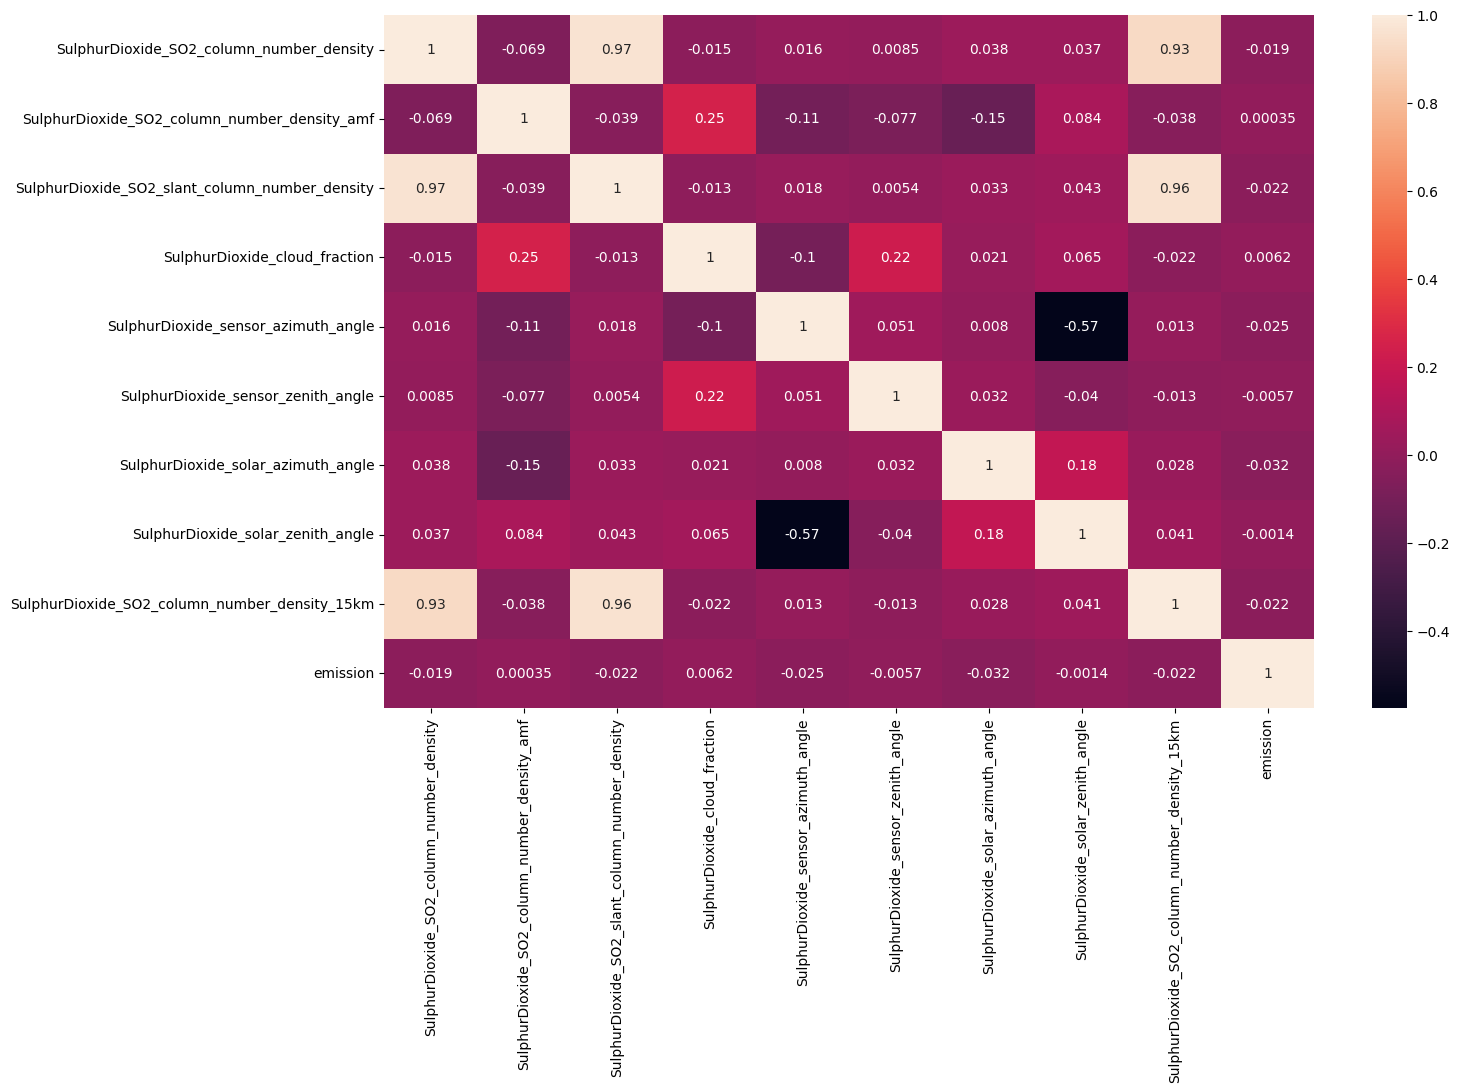

In [12]:
plt.figure(figsize=(15,9))
sns.heatmap(df[['SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_column_number_density_amf',
 'SulphurDioxide_SO2_slant_column_number_density',
 'SulphurDioxide_cloud_fraction',
 'SulphurDioxide_sensor_azimuth_angle',
 'SulphurDioxide_sensor_zenith_angle',
 'SulphurDioxide_solar_azimuth_angle',
 'SulphurDioxide_solar_zenith_angle',
 'SulphurDioxide_SO2_column_number_density_15km','emission']].corr(), annot=True)

<Axes: >

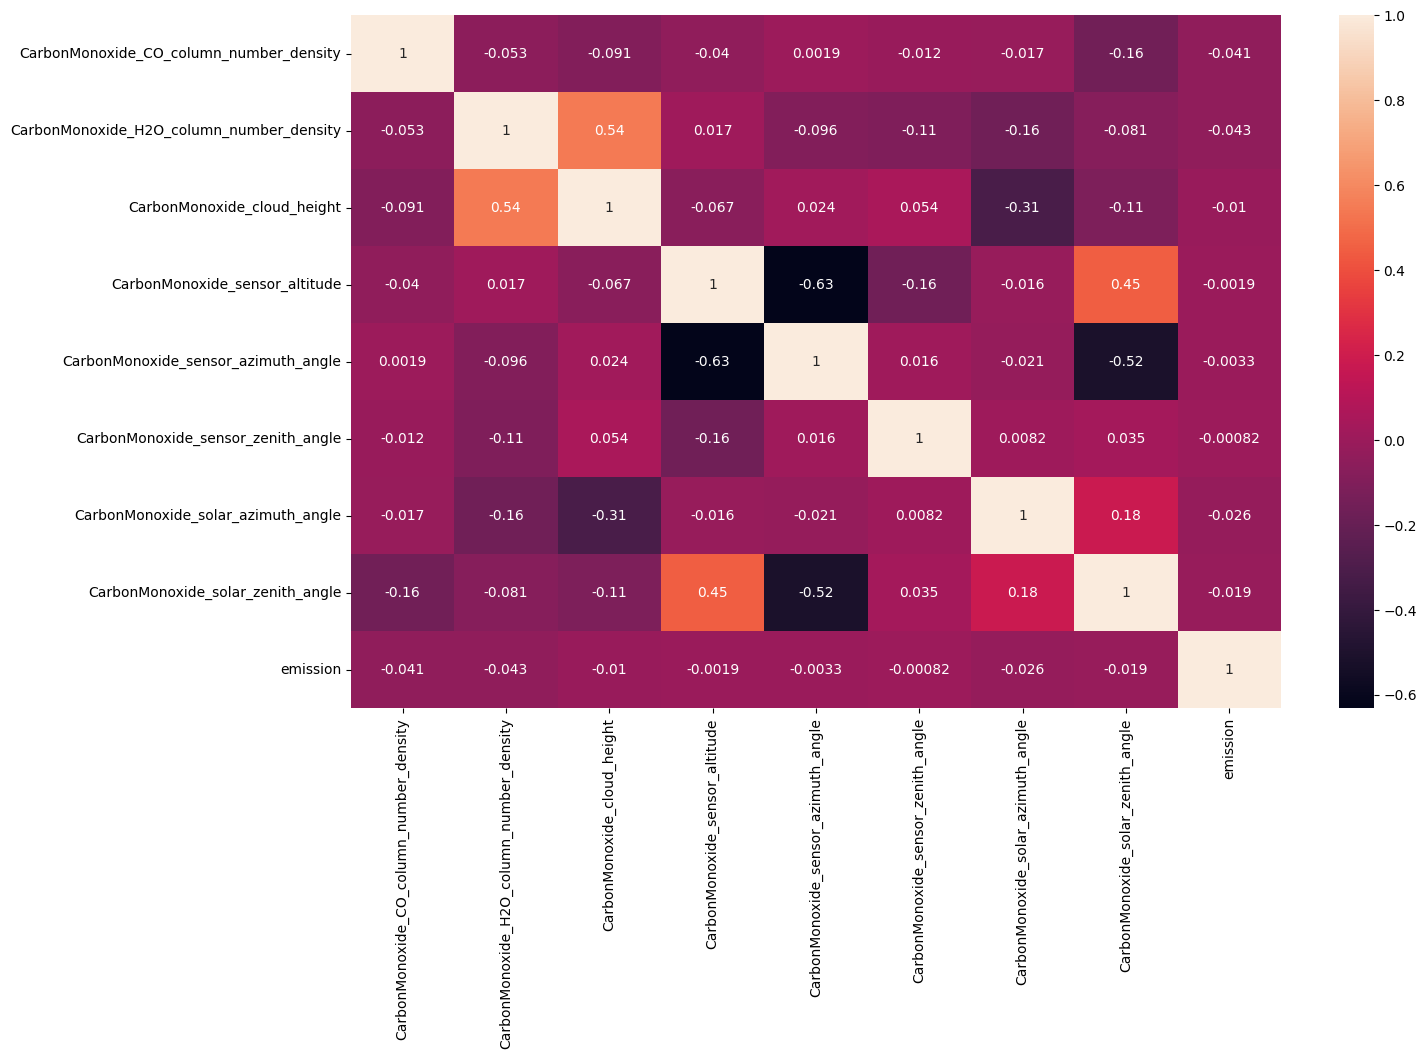

In [13]:
plt.figure(figsize=(15,9))
sns.heatmap(df[['CarbonMonoxide_CO_column_number_density',
 'CarbonMonoxide_H2O_column_number_density',
 'CarbonMonoxide_cloud_height',
 'CarbonMonoxide_sensor_altitude',
 'CarbonMonoxide_sensor_azimuth_angle',
 'CarbonMonoxide_sensor_zenith_angle',
 'CarbonMonoxide_solar_azimuth_angle',
 'CarbonMonoxide_solar_zenith_angle','emission']].corr(), annot=True)

<Axes: >

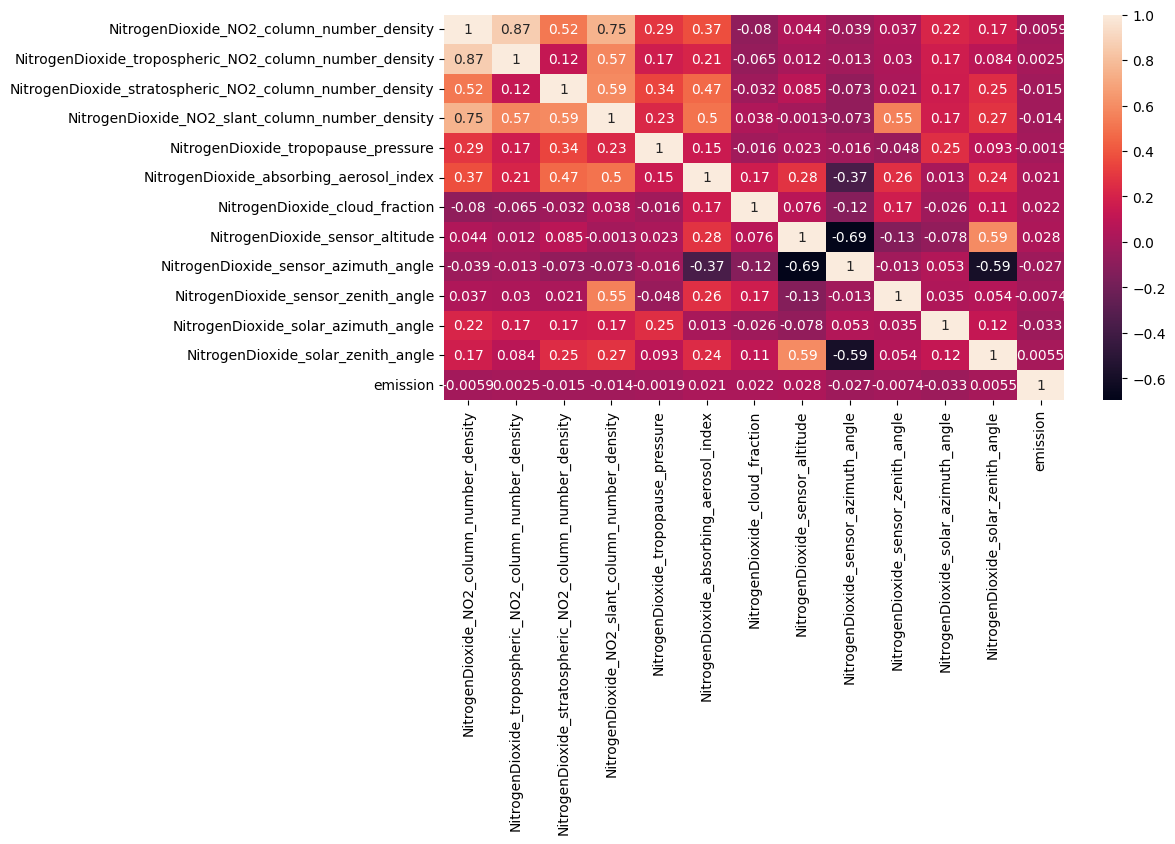

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_tropospheric_NO2_column_number_density',
 'NitrogenDioxide_stratospheric_NO2_column_number_density',
 'NitrogenDioxide_NO2_slant_column_number_density',
 'NitrogenDioxide_tropopause_pressure',
 'NitrogenDioxide_absorbing_aerosol_index',
 'NitrogenDioxide_cloud_fraction',
 'NitrogenDioxide_sensor_altitude',
 'NitrogenDioxide_sensor_azimuth_angle',
 'NitrogenDioxide_sensor_zenith_angle',
 'NitrogenDioxide_solar_azimuth_angle',
 'NitrogenDioxide_solar_zenith_angle','emission']].corr(), annot=True)

<Axes: >

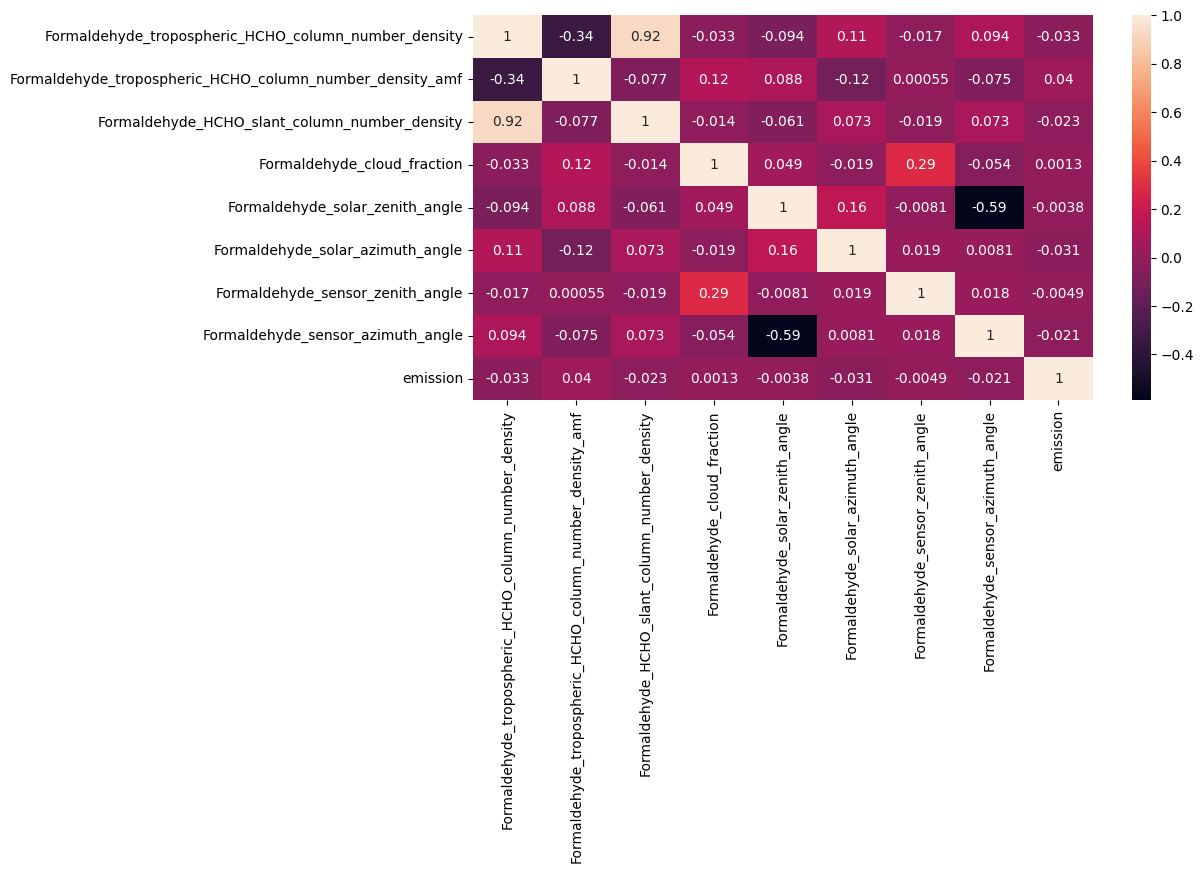

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['Formaldehyde_tropospheric_HCHO_column_number_density',
 'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
 'Formaldehyde_HCHO_slant_column_number_density',
 'Formaldehyde_cloud_fraction',
 'Formaldehyde_solar_zenith_angle',
 'Formaldehyde_solar_azimuth_angle',
 'Formaldehyde_sensor_zenith_angle',
 'Formaldehyde_sensor_azimuth_angle','emission']].corr(), annot=True)

<Axes: >

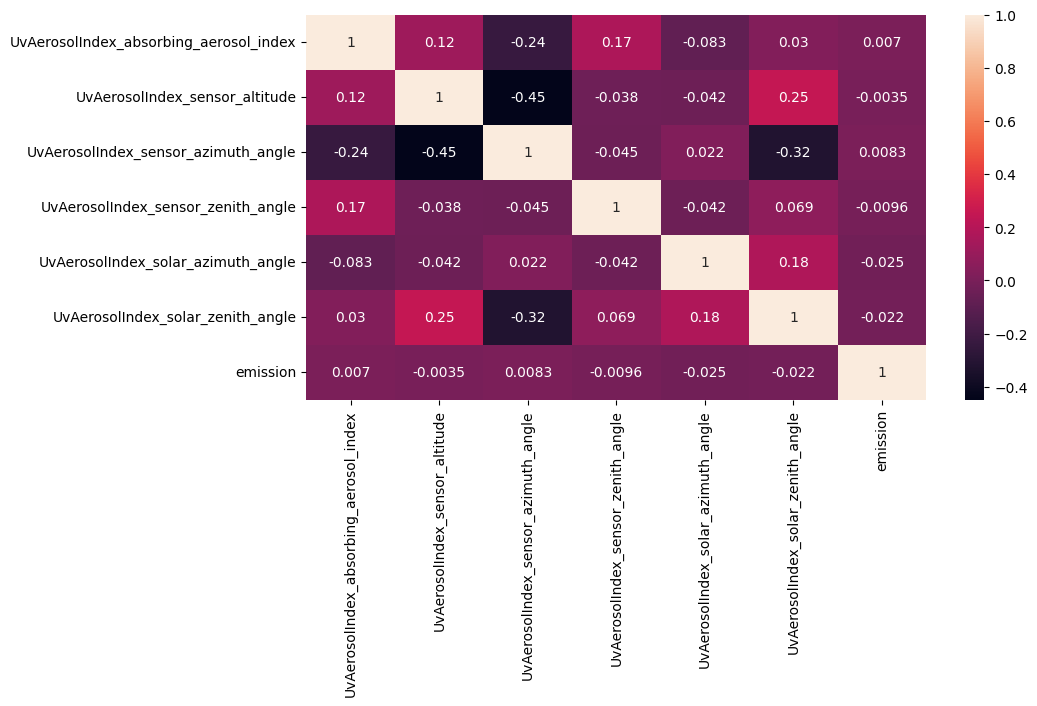

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['UvAerosolIndex_absorbing_aerosol_index',
 'UvAerosolIndex_sensor_altitude',
 'UvAerosolIndex_sensor_azimuth_angle',
 'UvAerosolIndex_sensor_zenith_angle',
 'UvAerosolIndex_solar_azimuth_angle',
 'UvAerosolIndex_solar_zenith_angle','emission']].corr(), annot=True)

<Axes: >

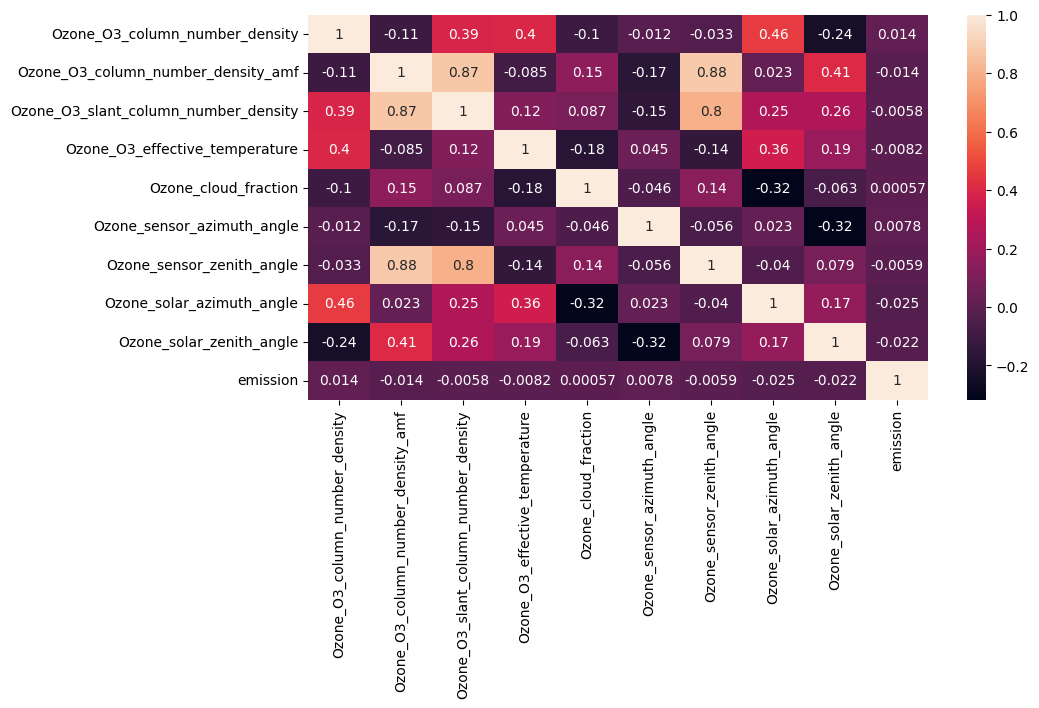

In [17]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['Ozone_O3_column_number_density',
 'Ozone_O3_column_number_density_amf',
 'Ozone_O3_slant_column_number_density',
 'Ozone_O3_effective_temperature',
 'Ozone_cloud_fraction',
 'Ozone_sensor_azimuth_angle',
 'Ozone_sensor_zenith_angle',
 'Ozone_solar_azimuth_angle',
 'Ozone_solar_zenith_angle','emission']].corr(), annot=True)

<Axes: >

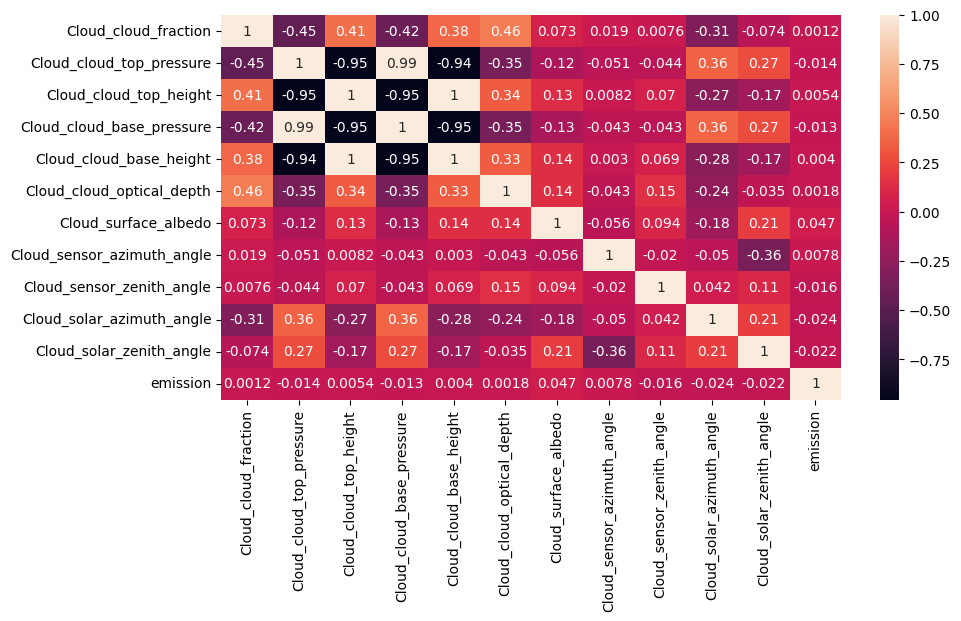

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['Cloud_cloud_fraction',
 'Cloud_cloud_top_pressure',
 'Cloud_cloud_top_height',
 'Cloud_cloud_base_pressure',
 'Cloud_cloud_base_height',
 'Cloud_cloud_optical_depth',
 'Cloud_surface_albedo',
 'Cloud_sensor_azimuth_angle',
 'Cloud_sensor_zenith_angle',
 'Cloud_solar_azimuth_angle',
 'Cloud_solar_zenith_angle','emission']].corr(), annot=True)

In [19]:
f_feat = ['latitude','longitude','year','week_no','SulphurDioxide_sensor_azimuth_angle','CarbonMonoxide_H2O_column_number_density','NitrogenDioxide_sensor_altitude',
          'Formaldehyde_tropospheric_HCHO_column_number_density_amf','UvAerosolIndex_solar_azimuth_angle','Ozone_solar_azimuth_angle','Cloud_solar_azimuth_angle','emission']

#### confirm missing values percentages

In [20]:
(df[f_feat].isnull().sum() / len(df) )* 100

latitude                                                     0.000000
longitude                                                    0.000000
year                                                         0.000000
week_no                                                      0.000000
SulphurDioxide_sensor_azimuth_angle                         18.487023
CarbonMonoxide_H2O_column_number_density                     2.685294
NitrogenDioxide_sensor_altitude                             23.183124
Formaldehyde_tropospheric_HCHO_column_number_density_amf     9.208711
UvAerosolIndex_solar_azimuth_angle                           0.682080
Ozone_solar_azimuth_angle                                    0.693469
Cloud_solar_azimuth_angle                                    0.612480
emission                                                     0.000000
dtype: float64

In [21]:
co2 = df.loc[:,f_feat]

In [22]:
# missing values
mv = [col for col in co2.columns if co2[col].isnull().sum() > 0]

In [23]:
co2[mv].describe()

,SulphurDioxide_sensor_azimuth_angle,CarbonMonoxide_H2O_column_number_density,NitrogenDioxide_sensor_altitude,Formaldehyde_tropospheric_HCHO_column_number_density_amf,UvAerosolIndex_solar_azimuth_angle,Ozone_solar_azimuth_angle,Cloud_solar_azimuth_angle
count,64414.000000,76901.000000,60703.000000,71746.000000,78484.000000,78475.000000,78539.000000
mean,-7.925870,2113.906233,829994.224471,1.254134,-86.548895,-86.529414,-86.800583
std,64.263368,619.561233,220.146974,0.274884,37.491634,37.390642,37.837269
min,-179.537059,276.370929,829248.037829,0.376463,-158.132324,-157.937073,-153.464211
25%,-56.782383,1698.455138,829847.875000,1.058027,-125.523336,-125.459912,-125.991158
50%,-12.441726,2035.418030,830007.833333,1.212767,-84.567350,-84.590871,-84.644352
75%,72.059990,2421.942057,830150.118750,1.415125,-48.023048,-48.109230,-48.132701
max,122.095200,9193.168945,830581.562500,2.760419,-26.558869,-26.556996,-22.653170


In [24]:
sns.pairplot(co2[mv])

Error in callback <function flush_figures at 0x000001CB1FF135B0> (for post_execute):


KeyboardInterrupt: 

The first four missing columns have a normal distribution, therefore they can be replaced by the mean values

<Axes: >

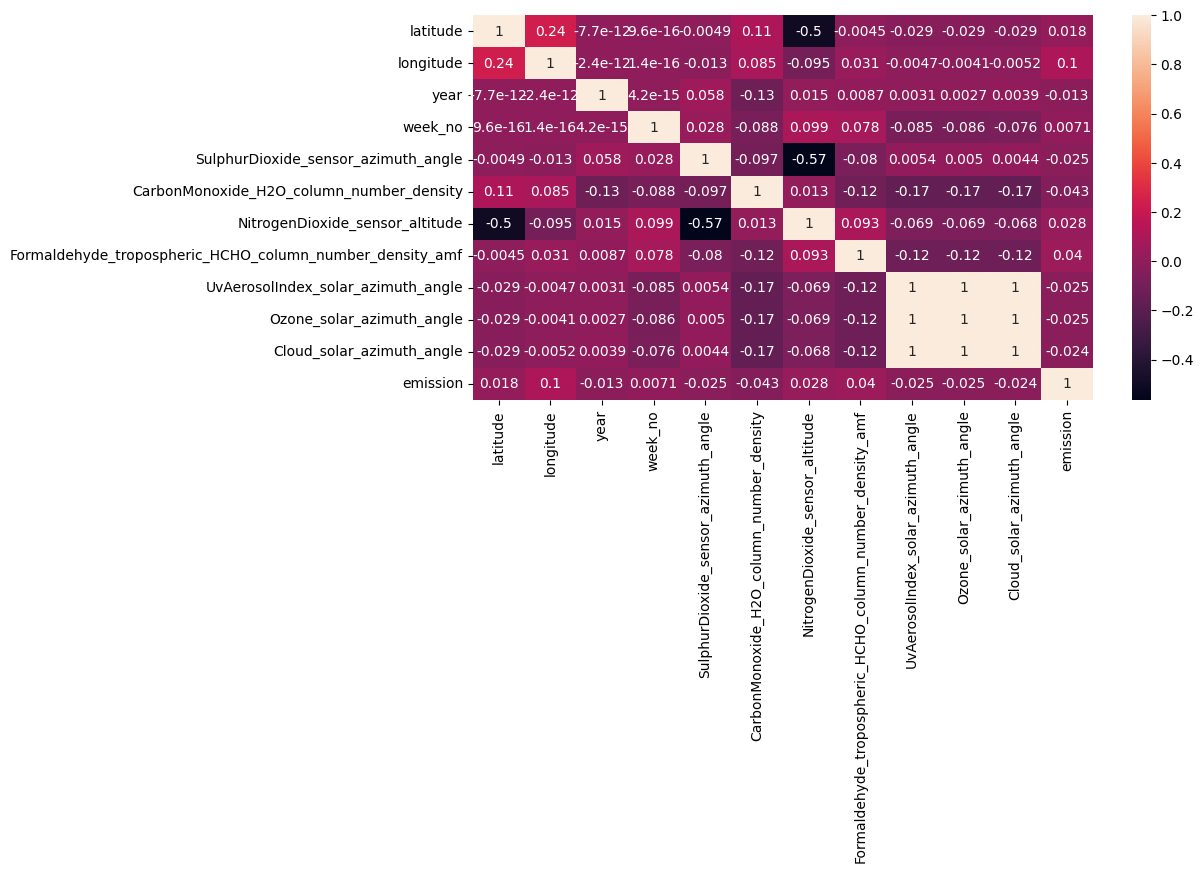

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(co2.corr(), annot=True)

In [26]:
co2.drop(['Ozone_solar_azimuth_angle','Cloud_solar_azimuth_angle'], axis=1,inplace=True)

In [27]:
co2.head()

,latitude,longitude,year,week_no,SulphurDioxide_sensor_azimuth_angle,CarbonMonoxide_H2O_column_number_density,NitrogenDioxide_sensor_altitude,Formaldehyde_tropospheric_HCHO_column_number_density_amf,UvAerosolIndex_solar_azimuth_angle,emission
0,-0.51,29.29,2019,0,-98.593887,1589.024536,NaN,0.863230,-138.786446,3.750994
1,-0.51,29.29,2019,1,16.592861,1772.574405,829859.960368,1.172826,-142.786141,4.025176
2,-0.51,29.29,2019,2,72.795837,2703.236800,829527.125000,1.175467,-135.364627,4.231381
3,-0.51,29.29,2019,3,NaN,2076.073332,NaN,NaN,-137.489602,4.305286
4,-0.51,29.29,2019,4,4.121269,2053.608490,829744.843750,0.869081,-136.448518,4.347317


In [28]:
co2.columns = ['latitude','longitude','year','week_no','sulphur_dioxide','carbon_monoxide','nitrogen_dioxide','formaldehyde','uv_aerosol_index','emission']

In [29]:
co2.head()

,latitude,longitude,year,week_no,sulphur_dioxide,carbon_monoxide,nitrogen_dioxide,formaldehyde,uv_aerosol_index,emission
0,-0.51,29.29,2019,0,-98.593887,1589.024536,NaN,0.863230,-138.786446,3.750994
1,-0.51,29.29,2019,1,16.592861,1772.574405,829859.960368,1.172826,-142.786141,4.025176
2,-0.51,29.29,2019,2,72.795837,2703.236800,829527.125000,1.175467,-135.364627,4.231381
3,-0.51,29.29,2019,3,NaN,2076.073332,NaN,NaN,-137.489602,4.305286
4,-0.51,29.29,2019,4,4.121269,2053.608490,829744.843750,0.869081,-136.448518,4.347317


#### Imputing and training using KNN imputer

In [30]:
from sklearn.impute import KNNImputer

In [31]:
X = co2.iloc[:,:-1]
y = co2.iloc[:,-1]

In [32]:
imputer = KNNImputer(n_neighbors=8)

In [33]:
imputer.fit(X)

KNNImputer(n_neighbors=8)

In [34]:
x_transformed = imputer.transform(X)

In [35]:
x_transformed[:5,:]

array([[-5.10000000e-01,  2.92900000e+01,  2.01900000e+03,
         0.00000000e+00, -9.85938873e+01,  1.58902454e+03,
         8.30127523e+05,  8.63229692e-01, -1.38786446e+02],
       [-5.10000000e-01,  2.92900000e+01,  2.01900000e+03,
         1.00000000e+00,  1.65928606e+01,  1.77257441e+03,
         8.29859960e+05,  1.17282632e+00, -1.42786141e+02],
       [-5.10000000e-01,  2.92900000e+01,  2.01900000e+03,
         2.00000000e+00,  7.27958374e+01,  2.70323680e+03,
         8.29527125e+05,  1.17546713e+00, -1.35364627e+02],
       [-5.10000000e-01,  2.92900000e+01,  2.01900000e+03,
         3.00000000e+00,  5.17736700e+01,  2.07607333e+03,
         8.29616988e+05,  1.12995032e+00, -1.37489602e+02],
       [-5.10000000e-01,  2.92900000e+01,  2.01900000e+03,
         4.00000000e+00,  4.12126865e+00,  2.05360849e+03,
         8.29744844e+05,  8.69081199e-01, -1.36448518e+02]])

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x_transformed,y, train_size=0.7,random_state=44)

In [38]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mse,rmse,r2_square

 - Cross validation to check the variation in dataset
 - evaluation of models
 - Grid search for best parameter of the best model

In [39]:
# train multiple models
models = {
    'Decision Tree':DecisionTreeRegressor(),
    'Lasso': Lasso(),
    'Linear Regression': LinearRegression(),
    'RandomForest':RandomForestRegressor(),
    "Gradient boosting": GradientBoostingRegressor()

}

model_list = []
r2_list = []
adjusted_r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    scores = cross_val_score(model, x_transformed,y, cv=5)

    # make predictions
    y_pred = model.predict(X_test)

    mse,rmse,r2_square = evaluate_model(y_test,y_pred)
    Adj_r2 = 1 - (1-r2_square) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('Model training Performance')
    print("Mean Squared Error:",mse)
    print("Root Mean Square Error:",rmse)
    print('R2 Score',r2_square*100)
    print('Adjusted R2 Score',Adj_r2*100)
    print("Mean score of cross validation", np.abs(np.mean(scores)))

    r2_list.append(r2_square)
    adjusted_r2_list.append(Adj_r2)
    model_list.append(model)
    
    print('='*35)
    print('\n')

Decision Tree
Model training Performance
Mean Squared Error: 538.9839086002174
Root Mean Square Error: 23.216026977073778
R2 Score 97.45467261022512
Adjusted R2 Score 97.45425840658521
Mean score of cross validation 1.1717397326033114


Lasso
Model training Performance
Mean Squared Error: 20857.9067654237
Root Mean Square Error: 144.422667076272
R2 Score 1.4994686552273206
Adjusted R2 Score 1.4834395664828248
Mean score of cross validation 0.6015600813087022


Linear Regression
Model training Performance
Mean Squared Error: 20850.90145049344
Root Mean Square Error: 144.39841221597084
R2 Score 1.5325509415098582
Adjusted R2 Score 1.5165272362784754
Mean score of cross validation 0.6809114077186907


RandomForest
Model training Performance
Mean Squared Error: 334.32211756056773
Root Mean Square Error: 18.28447750307806
R2 Score 98.42117876015175
Adjusted R2 Score 98.42092183701216
Mean score of cross validation 0.7274238820741774


Gradient boosting
Model training Performance
Mean Square

In [55]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['mae', 'mse']
             }
dt_model = DecisionTreeRegressor(random_state=1024)
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['mae', 'mse'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [56]:
grid_search.best_params_, grid_search.best_score_

({'ccp_alpha': 0.001,
  'criterion': 'mse',
  'max_depth': 9,
  'max_features': 'auto'},
 0.8386919712091453)

In [42]:
dt_reg = DecisionTreeRegressor(ccp_alpha=0.001,criterion='friedman_mse',max_depth=9)
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)
evaluate_model(y_test,y_pred)

(3235.216136546724, 56.87896040318181, 0.8472183656543631)

In [45]:
import pickle

# Assume clf is your trained model
with open(r'C:\Users\SameerAhamed\Documents\GitHub\MACHINE-LEARNING-DSCI6601-PROJECT\models\DesicionTreeRegressor_NTS.pkl', 'wb') as file:
    pickle.dump(dt_reg, file)

In [58]:
def save_model(filename,model):
    with open(r'C:\Users\SameerAhamed\Documents\GitHub\MACHINE-LEARNING-DSCI6601-PROJECT\models\\'+filename, 'wb') as file:
        pickle.dump(model, file)

In [47]:
x1 = co2.iloc[:, 0:4]
y1 = co2.iloc[:,-1]

In [48]:
x1.head(), y[:5]

(   latitude  longitude  year  week_no
 0     -0.51      29.29  2019        0
 1     -0.51      29.29  2019        1
 2     -0.51      29.29  2019        2
 3     -0.51      29.29  2019        3
 4     -0.51      29.29  2019        4,
 0    3.750994
 1    4.025176
 2    4.231381
 3    4.305286
 4    4.347317
 Name: emission, dtype: float64)

In [49]:
new = x1.copy()
new['emission'] = y1.copy()
new.head()

,latitude,longitude,year,week_no,emission
0,-0.51,29.29,2019,0,3.750994
1,-0.51,29.29,2019,1,4.025176
2,-0.51,29.29,2019,2,4.231381
3,-0.51,29.29,2019,3,4.305286
4,-0.51,29.29,2019,4,4.347317


In [50]:
mean_emi = new.groupby("year")['emission'].mean()
mean_emi.reset_index()
mean_emi.head()

year
2019    87.255317
2020    75.992122
2021    82.574217
Name: emission, dtype: float64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x1,y1, train_size=0.7,random_state=44)

In [52]:
# train multiple models
models = {
    'Decision Tree':DecisionTreeRegressor(),
    'Lasso': Lasso(),
    'Linear Regression': LinearRegression(),
    'RandomForest':RandomForestRegressor(),
    "Gradient boosting": GradientBoostingRegressor()

}

model_list = []
r2_list = []
adjusted_r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x1,y1)
    scores = cross_val_score(model, x1,y1, cv=5)

    # make predictions
    y_pred = model.predict(X_test)

    mse,rmse,r2_square = evaluate_model(y_test,y_pred)
    Adj_r2 = 1 - (1-r2_square) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('Model training Performance')
    print("Mean Squared Error:",mse)
    print("Root Mean Square Error:",rmse)
    print('R2 Score',r2_square*100)
    print('Adjusted R2 Score',Adj_r2*100)
    print("Mean score of cross validation", np.abs(np.mean(scores)))

    r2_list.append(r2_square)
    adjusted_r2_list.append(Adj_r2)
    model_list.append(model)
    
    print('='*35)
    print('\n')

Decision Tree
Model training Performance
Mean Squared Error: 2.1296282926622834e-33
Root Mean Square Error: 4.614789586386668e-17
R2 Score 100.0
Adjusted R2 Score 100.0
Mean score of cross validation 1.1491338578346384


Lasso
Model training Performance
Mean Squared Error: 20968.333291517483
Root Mean Square Error: 144.804465716764
R2 Score 0.9779843271438438
Adjusted R2 Score 0.9708232188165522
Mean score of cross validation 0.6121154113813162


Linear Regression
Model training Performance
Mean Squared Error: 20967.91929619074
Root Mean Square Error: 144.80303621192044
R2 Score 0.9799394015488128
Adjusted R2 Score 0.9727784346092672
Mean score of cross validation 0.6849459237760032


RandomForest
Model training Performance
Mean Squared Error: 22.611156860212233
Root Mean Square Error: 4.755119016408762
R2 Score 99.89321982353746
Adjusted R2 Score 99.8932121013718
Mean score of cross validation 0.7472177381697404


Gradient boosting
Model training Performance
Mean Squared Error: 3694.7

In [59]:
count = 0
for i in range(5):
    name = model_list[count]
    model = model_list[count+1]
    count += 2
    save_model(name+'.pkl',model)

In [72]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['mse']
             }
dt_model = DecisionTreeRegressor(random_state=1024)
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001], 'criterion': ['mse'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [73]:
grid_search.best_score_ , grid_search.best_params_, grid_search.best_estimator_

(0.8420658597440802,
 {'ccp_alpha': 0.001,
  'criterion': 'mse',
  'max_depth': 9,
  'max_features': 'auto'},
 DecisionTreeRegressor(ccp_alpha=0.001, max_depth=9, max_features='auto',
                       random_state=1024))

In [74]:
dt_reg = DecisionTreeRegressor(ccp_alpha=0.001, max_depth=9, max_features='auto',criterion='mse')
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)
evaluate_model(y_test,y_pred)

(3135.367819511121, 55.994355246856095, 0.8519336577459895)

In [75]:
import pickle

# Assume clf is your trained model
with open('model_time_series.pkl', 'wb') as file:
    pickle.dump(dt_reg, file)

In [40]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude          79023 non-null  float64
 1   longitude         79023 non-null  float64
 2   year              79023 non-null  int64  
 3   week_no           79023 non-null  int64  
 4   sulphur_dioxide   79023 non-null  float64
 5   carbon_monoxide   79023 non-null  float64
 6   nitrogen_dioxide  79023 non-null  float64
 7   formaldehyde      79023 non-null  float64
 8   uv_aerosol_index  78484 non-null  float64
 9   emission          79023 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 6.0 MB


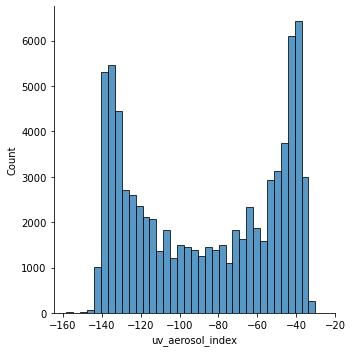

In [41]:
sns.displot(data=co2,x='uv_aerosol_index')

In [42]:
uv_median = co2['uv_aerosol_index'].median()

In [43]:
co2['uv_aerosol_index'].fillna(uv_median,inplace=True)

In [44]:
co2

,latitude,longitude,year,week_no,sulphur_dioxide,carbon_monoxide,nitrogen_dioxide,formaldehyde,uv_aerosol_index,emission
0,-0.510,29.290,2019,0,-98.593887,1589.024536,829994.224471,0.863230,-138.786446,3.750994
1,-0.510,29.290,2019,1,16.592861,1772.574405,829859.960368,1.172826,-142.786141,4.025176
2,-0.510,29.290,2019,2,72.795837,2703.236800,829527.125000,1.175467,-135.364627,4.231381
3,-0.510,29.290,2019,3,-7.925870,2076.073332,829994.224471,1.254134,-137.489602,4.305286
4,-0.510,29.290,2019,4,4.121269,2053.608490,829744.843750,0.869081,-136.448518,4.347317
...,...,...,...,...,...,...,...,...,...,...
79018,-3.299,30.301,2021,48,72.820518,1999.322864,830208.833058,1.712300,-129.949217,29.404171
79019,-3.299,30.301,2021,49,-12.856753,1887.259212,830354.500000,1.686760,-133.307545,29.186497
79020,-3.299,30.301,2021,50,-7.925870,1967.424136,830419.335612,1.304604,-134.750981,29.131205
79021,-3.299,30.301,2021,51,-100.344827,3394.020508,830375.349911,1.222815,-139.470709,28.125792


In [45]:
# Check for any duplicates
co2.duplicated().any()

False

In [46]:
co2.isnull().sum()

latitude            0
longitude           0
year                0
week_no             0
sulphur_dioxide     0
carbon_monoxide     0
nitrogen_dioxide    0
formaldehyde        0
uv_aerosol_index    0
emission            0
dtype: int64

<AxesSubplot:>

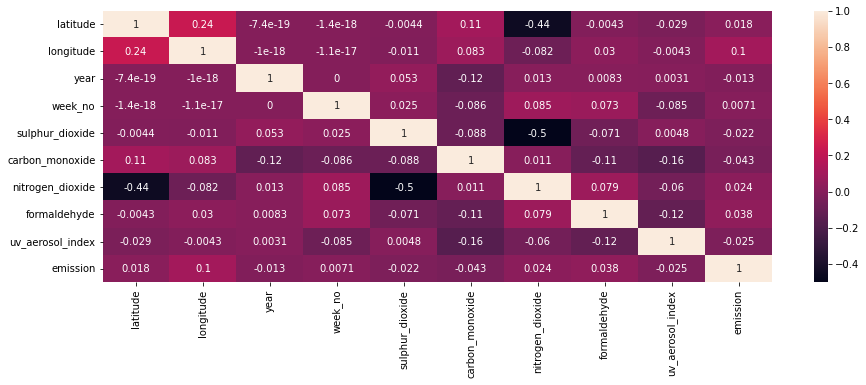

In [47]:
plt.figure(figsize=(15,5))
sns.heatmap(co2.corr(),annot=True)

In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [49]:
X = co2.iloc[:, :-1]
Y = co2.iloc[:,-1]
print(X.head(), Y[:5])

   latitude  longitude  year  week_no  sulphur_dioxide  carbon_monoxide  \
0     -0.51      29.29  2019        0       -98.593887      1589.024536   
1     -0.51      29.29  2019        1        16.592861      1772.574405   
2     -0.51      29.29  2019        2        72.795837      2703.236800   
3     -0.51      29.29  2019        3        -7.925870      2076.073332   
4     -0.51      29.29  2019        4         4.121269      2053.608490   

   nitrogen_dioxide  formaldehyde  uv_aerosol_index  
0     829994.224471      0.863230       -138.786446  
1     829859.960368      1.172826       -142.786141  
2     829527.125000      1.175467       -135.364627  
3     829994.224471      1.254134       -137.489602  
4     829744.843750      0.869081       -136.448518   0    3.750994
1    4.025176
2    4.231381
3    4.305286
4    4.347317
Name: emission, dtype: float64


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7,random_state=44)

In [51]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mse,rmse,r2_square

In [52]:
# # train multiple models
# models = {
#     'Decision Tree':DecisionTreeRegressor(),
#     'Lasso': Lasso(),
#     'Linear Regression': LinearRegression(),
#     'RandomForest':RandomForestRegressor(),
#     'SVR': SVR()

# }

# model_list = []
# r2_list = []
# adjusted_r2_list = []

# for i in range(len(list(models))):
#     model = list(models.values())[i]
#     model.fit(X_train,y_train)

#     # make predictions
#     y_pred = model.predict(X_test)

#     mse,rmse,r2_square = evaluate_model(y_test,y_pred)
#     Adj_r2 = 1 - (1-r2_square) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

#     print(list(models.keys())[i])
#     model_list.append(list(models.keys())[i])
#     print('Model training Performance')
#     print("Mean Squared Error:",mse)
#     print("Root Mean Square Error:",rmse)
#     print('R2 Score',r2_square*100)
#     print('Adjusted R2 Score',Adj_r2*100)

#     r2_list.append(r2_square)
#     adjusted_r2_list.append(Adj_r2)
    
#     print('='*35)
#     print('\n')